# Vendedor IA | Ajudando vendedores de Brasal Veículos

[<-- notebook "Data Clean"](https://github.com/piegu/fastai-projects/blob/master/vendas_veiculos_brasal_data_clean.ipynb)

- Autor: [Pierre Guillou](https://www.linkedin.com/in/pierreguillou)
- Data: Maio 2019
- Hackathon Brasal/PCTec-UnB 2019: http://www.brasal.com.br/inovacao/hackathon/
- Datasets do Brasal: http://www.brasal.com.br/inovacao/hackathon/wp-content/uploads/2019/05/oficial.zip
- Biblioteca de Deep Learning usada: [Fastai v1](https://docs.fast.ai/) (Deep Learning com PyTorch)
- Inspiração do Fastai notebook "Rossmann": https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson6-rossmann.ipynb

## Overview

O **Hackathon Brasal/PCTec-UnB 2019** foi uma maratona de dados (dias 9 e 10 de maio de 2019), que reuniu estudantes, profissionais e comunidade, com o desafio de em dois dias, realizaram um projeto de Bussiness Intelligence para um cliente real: [Brasal Veículos](http://vw.brasal.com.br/). Aconteceu no [CDT](http://www.cdt.unb.br/) da Universidade de Brasília (UnB) no Brasil.

Nesse contexto, minha equipe desenvolveu o projeto **"Vendedor IA" (VIA), um conjunto de modelos de Inteligência Artificial (IA) usando o Deep Learning** cujo princípio é descrito nos parágrafos seguintes.

**Vendedor IA (VIA)**

O VIA é uma ferramenta de IA (um conjunto de modelos usando o Deep Learning) que **ajuda os vendedores de Brasal Veículos a atingir a suas metas de vendas**. 

Ele não é um avatar que vende diretamente os veículos. Graças ao treinamento com os dados de vendas do passado, **faz previsões personalisadas em função do perfil de cada cliente**. Por exemplo: estimativa do orçamento que o cliente está disposto a gastar na compra de um veículo, previsão da categoria de veículo que o cliente mais gosta, previsão da data de compra mais provável, etc.).

**VIA modeliza o mundo cliente-vendedor**

Graças ao treinamento com os dados de vendas do passado, **as redes neurais do VIA modelizam o mundo cliente-vendedor no contexto das vendas de veículos Brasal**. 

**Treinamento dos modelos de IA**

Os modelos de IA são treinados a partir dos dados de vendas de veículos Brasal dos últimos anos e são atualizados todas as noites com os dados de vendas do dia. 

**Modelos desenvolvidos no contexto do hackathon**

Muitos modelos AI podem ser desenvolvidos para o VIA (veja exemplos dados). Apenas para mostrar como, um **modelo de regressão fornecendo o orçamento que o cliente está disposto a gastar na compra de um veículo** está disponível online no github ([vendedor_IA_vendas_veiculos_brasal_REGRESSAO.ipynb](https://github.com/piegu/fastai-projects/edit/master/vendedor_IA_vendas_veiculos_brasal_REGRESSAO.ipynb)).

**AI4BI (Artificial Intelligence for Business Intelligence)**

O VIA é também um **projeto AI4BI**: as previsões do VIA vão para um aplicativo de BI que permite aos vendedores de Brasal Veículos de visualizá-las em gráficos interativos.

## Notebooks

2 jupyter notebooks foram criados:
1. **Data clean** ([vendas_veiculos_brasal_data_clean.ipynb](https://github.com/piegu/fastai-projects/blob/master/vendas_veiculos_brasal_data_clean.ipynb)): é o notebook de preparação da tabela de dados de vendas para treinar os modelos do VIA.
2. **Regressão** ([vendedor_IA_vendas_veiculos_brasal_REGRESSAO.ipynb](https://github.com/piegu/fastai-projects/blob/master/vendedor_IA_vendas_veiculos_brasal_REGRESSAO.ipynb)): é o notebook de treinamento do modelo que fornece o orçamento que o cliente está disposto a gastar na compra de um veículo.

## Initialisation

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *

In [3]:
from fastai.callbacks import * 

In [4]:
import fastai
print(f'fastai: {fastai.__version__}')
print(f'cuda: {torch.cuda.is_available()}')

fastai: 1.0.52
cuda: True


## Data

Os dados de vendas de veículos Brasal ao longo de 4 anos foram processados (feature-engineered) no notebook [vendas_veiculos_brasal_data_clean.ipynb](...). O resultado é um dataframe único se chamando `df_vendas`.

In [5]:
PATH = Config().data_path()/'brasal'

# load file
df_vendas = pd.read_pickle(PATH/'df_vendas_clean_DaysElapsed')

In [6]:
df_vendas.head().T

,0,1,2,3,4
EMPRESA_VENDAS,1,1,1,5,1
REVENDA_VENDAS,1,1,1,1,1
DTA_ENTRADA_SAIDA,2015-03-25 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2018-09-18 00:00:00,2015-05-14 00:00:00
CLIENTE,52302,1,1,51804,1
VAL_TOTAL_REAL_ITEM,48800,37008.1,37043.2,41869.3,127944
VAL_TOTAL_NOTA_ITEM,48800,37008.1,37043.2,41869.3,127944
VAL_CUSTO_CONTABIL,47713.8,37008.1,37043.2,41869.3,127944
VENDEDOR,110004,110011,110011,4000020,110011
VAL_BONUS,0,0,0,0,0
MODELO,5U4FE4,6A53K4,5U3PN4,5U7TA4,2HBB3A


In [7]:
len(df_vendas)

7284

### Preparing full data set

In [8]:
# Sort df by date (DTA_ENTRADA_SAIDA) in ascending order
df_vendas.sort_values(by=['DTA_ENTRADA_SAIDA'], inplace=True, ascending=True)
df_vendas_sorted = df_vendas.reset_index(drop=True)

In [9]:
# Get list of colunms
list_col = list(df_vendas_sorted.columns.values)
list_col

['EMPRESA_VENDAS',
 'REVENDA_VENDAS',
 'DTA_ENTRADA_SAIDA',
 'CLIENTE',
 'VAL_TOTAL_REAL_ITEM',
 'VAL_TOTAL_NOTA_ITEM',
 'VAL_CUSTO_CONTABIL',
 'VENDEDOR',
 'VAL_BONUS',
 'MODELO',
 'DATA_NASCIMENTO',
 'SEXO',
 'ESTADO_CIVIL',
 'SITUACAO_CREDITO',
 'CLIENTE_TIPO',
 'TIPO_PESSOA',
 'CLIENTE_DTCADASTRO',
 'EMPRESA_ORIGEM',
 'REVENDA_ORIGEM',
 'DTPRIMEIRAFATURA',
 'DTULTIMAFATURA',
 'LIMITE_CREDITO',
 'CEP1',
 'CEP2',
 'CEP3',
 'DES_MODELO',
 'FAMILIA',
 'MARCA',
 'CLASSIFICACAO',
 'DTA_ENTRADA_SAIDA_Year',
 'DTA_ENTRADA_SAIDA_Month',
 'DTA_ENTRADA_SAIDA_Week',
 'DTA_ENTRADA_SAIDA_Day',
 'DTA_ENTRADA_SAIDA_Dayofweek',
 'DTA_ENTRADA_SAIDA_Dayofyear',
 'DTA_ENTRADA_SAIDA_Is_month_end',
 'DTA_ENTRADA_SAIDA_Is_month_start',
 'DTA_ENTRADA_SAIDA_Is_quarter_end',
 'DTA_ENTRADA_SAIDA_Is_quarter_start',
 'DTA_ENTRADA_SAIDA_Is_year_end',
 'DTA_ENTRADA_SAIDA_Is_year_start',
 'DTA_ENTRADA_SAIDA_Elapsed',
 'DATA_NASCIMENTO_Year',
 'DATA_NASCIMENTO_Month',
 'DATA_NASCIMENTO_Week',
 'DATA_NASCIMENTO_Day

In [10]:
# Selection of variables continue
cont_vars = ['LIMITE_CREDITO']

# Selection of variables category
cat_vars = [
 'EMPRESA_VENDAS',
 'REVENDA_VENDAS',
#  'DTA_ENTRADA_SAIDA',
#  'CLIENTE',
#  'VAL_TOTAL_REAL_ITEM',
#  'VAL_TOTAL_NOTA_ITEM',
#  'VAL_CUSTO_CONTABIL',
#  'VENDEDOR',
#  'VAL_BONUS',
#  'MODELO',
#  'DATA_NASCIMENTO',
 'SEXO',
 'ESTADO_CIVIL',
 'SITUACAO_CREDITO',
 'CLIENTE_TIPO',
 'TIPO_PESSOA',
#  'CLIENTE_DTCADASTRO',
 'EMPRESA_ORIGEM',
 'REVENDA_ORIGEM',
#  'DTPRIMEIRAFATURA',
#  'DTULTIMAFATURA',
#  'LIMITE_CREDITO',
 'CEP1',
 'CEP2',
 'CEP3',
#  'DES_MODELO',
#  'FAMILIA',
#  'MARCA',
#  'CLASSIFICACAO',
 'DTA_ENTRADA_SAIDA_Year', #13
 'DTA_ENTRADA_SAIDA_Month',
#  'DTA_ENTRADA_SAIDA_Week',
#  'DTA_ENTRADA_SAIDA_Day',
 'DTA_ENTRADA_SAIDA_Dayofweek', #17
#  'DTA_ENTRADA_SAIDA_Dayofyear',
 'DTA_ENTRADA_SAIDA_Is_month_end',
 'DTA_ENTRADA_SAIDA_Is_month_start',
 'DTA_ENTRADA_SAIDA_Is_quarter_end',
 'DTA_ENTRADA_SAIDA_Is_quarter_start',
 'DTA_ENTRADA_SAIDA_Is_year_end',
 'DTA_ENTRADA_SAIDA_Is_year_start', #23
#  'DTA_ENTRADA_SAIDA_Elapsed',
 'DATA_NASCIMENTO_Year', #24
 'DATA_NASCIMENTO_Month',
#  'DATA_NASCIMENTO_Week',
#  'DATA_NASCIMENTO_Day',
#  'DATA_NASCIMENTO_Dayofweek',
#  'DATA_NASCIMENTO_Dayofyear',
 'DATA_NASCIMENTO_Is_month_end',
 'DATA_NASCIMENTO_Is_month_start',
 'DATA_NASCIMENTO_Is_quarter_end',
 'DATA_NASCIMENTO_Is_quarter_start',
 'DATA_NASCIMENTO_Is_year_end', #30
 'DATA_NASCIMENTO_Is_year_start',
#  'DATA_NASCIMENTO_Elapsed',
 'CLIENTE_DTCADASTRO_Year',
 'CLIENTE_DTCADASTRO_Month',
#  'CLIENTE_DTCADASTRO_Week',
#  'CLIENTE_DTCADASTRO_Day',
#  'CLIENTE_DTCADASTRO_Dayofweek',
#  'CLIENTE_DTCADASTRO_Dayofyear',
 'CLIENTE_DTCADASTRO_Is_month_end',
 'CLIENTE_DTCADASTRO_Is_month_start',
 'CLIENTE_DTCADASTRO_Is_quarter_end',
 'CLIENTE_DTCADASTRO_Is_quarter_start',
 'CLIENTE_DTCADASTRO_Is_year_end',
 'CLIENTE_DTCADASTRO_Is_year_start',
#  'CLIENTE_DTCADASTRO_Elapsed',
#  'DTPRIMEIRAFATURA_Year',
#  'DTPRIMEIRAFATURA_Month',
#  'DTPRIMEIRAFATURA_Week',
#  'DTPRIMEIRAFATURA_Day',
#  'DTPRIMEIRAFATURA_Dayofweek',
#  'DTPRIMEIRAFATURA_Dayofyear',
#  'DTPRIMEIRAFATURA_Is_month_end',
#  'DTPRIMEIRAFATURA_Is_month_start',
#  'DTPRIMEIRAFATURA_Is_quarter_end',
#  'DTPRIMEIRAFATURA_Is_quarter_start',
#  'DTPRIMEIRAFATURA_Is_year_end',
#  'DTPRIMEIRAFATURA_Is_year_start',
#  'DTPRIMEIRAFATURA_Elapsed',
#  'DTULTIMAFATURA_Year',
#  'DTULTIMAFATURA_Month',
#  'DTULTIMAFATURA_Week',
#  'DTULTIMAFATURA_Day',
#  'DTULTIMAFATURA_Dayofweek',
#  'DTULTIMAFATURA_Dayofyear',
#  'DTULTIMAFATURA_Is_month_end',
#  'DTULTIMAFATURA_Is_month_start',
#  'DTULTIMAFATURA_Is_quarter_end',
#  'DTULTIMAFATURA_Is_quarter_start',
#  'DTULTIMAFATURA_Is_year_end',
#  'DTULTIMAFATURA_Is_year_start',
#  'DTULTIMAFATURA_Elapsed',
#  'DTA_VENDA_CADASTRO_DaysElapsed'
]

In [11]:
# target (out of the neural network)
dep_var = 'VAL_TOTAL_REAL_ITEM'
(df_vendas_sorted[dep_var] > 0.).sum(), df_vendas_sorted[dep_var].dtype

(7284, dtype('float64'))

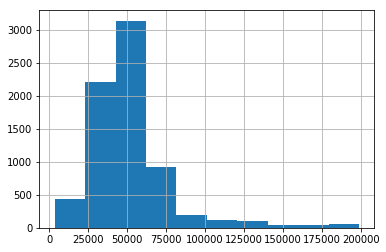

In [12]:
# Histogram of sales prices
df_vendas_sorted[dep_var].hist()

In [13]:
# Get index of test set (5% of last sales of df_vendas)
num_test = int(0.05*len(df_vendas_sorted))
test_idx = range(len(df_vendas_sorted)-num_test, len(df_vendas_sorted))
df_test = df_vendas_sorted.loc[test_idx].copy()

In [14]:
train_valid_idx = range(len(df_vendas_sorted)-num_test)
df_train_valid = df_vendas_sorted.loc[train_valid_idx].copy()

In [15]:
# Get index of valid set (15% of last sales of df_train_valid)
num_valid = int(0.15*len(df_train_valid))
valid_idx = range(len(df_train_valid)-num_valid, len(df_train_valid))
df_valid = df_train_valid.loc[valid_idx].copy()

In [16]:
train_idx = range(len(df_train_valid)-num_valid)
df_train = df_train_valid.loc[train_idx].copy()

In [17]:
# save train_valid_idx
with open(PATH/'train_valid_idx_r', 'wb') as f:
    pickle.dump(train_valid_idx, f)
                
# save valid_idx
with open(PATH/'valid_idx_r', 'wb') as f:
    pickle.dump(valid_idx, f)
    
# save test_idx
with open(PATH/'test_idx_r', 'wb') as f:
    pickle.dump(test_idx, f)
    
# save tables
df_tr_vd_test_vendas = [df_train, df_valid, df_test, df_train_valid, df_vendas_sorted]

with open(PATH/'df_tr_vd_test_vendas_r', 'wb') as f:
    pickle.dump(df_tr_vd_test_vendas, f)

### Databunch

In [18]:
# List of process to apply on df_vendas_sorted
procs=[FillMissing, Categorify, Normalize]

In [19]:
# doc(TabularList.from_df)

In [20]:
# create the databunch (dataset and dataloader)
data = (TabularList.from_df(df_vendas_sorted, path=PATH, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(df_test, path=PATH, cat_names=cat_vars, cont_names=cont_vars))
                .databunch(bs=64,num_workers=0))

In [21]:
len(data.train_ds),len(data.valid_ds),len(data.test_ds)

(6246, 1038, 364)

In [22]:
# number of classes
data.c

1

In [23]:
data.show_batch(rows=10)

EMPRESA_VENDAS,REVENDA_VENDAS,SEXO,ESTADO_CIVIL,SITUACAO_CREDITO,CLIENTE_TIPO,TIPO_PESSOA,EMPRESA_ORIGEM,REVENDA_ORIGEM,CEP1,CEP2,CEP3,DTA_ENTRADA_SAIDA_Year,DTA_ENTRADA_SAIDA_Month,DTA_ENTRADA_SAIDA_Dayofweek,DTA_ENTRADA_SAIDA_Is_month_end,DTA_ENTRADA_SAIDA_Is_month_start,DTA_ENTRADA_SAIDA_Is_quarter_end,DTA_ENTRADA_SAIDA_Is_quarter_start,DTA_ENTRADA_SAIDA_Is_year_end,DTA_ENTRADA_SAIDA_Is_year_start,DATA_NASCIMENTO_Year,DATA_NASCIMENTO_Month,DATA_NASCIMENTO_Is_month_end,DATA_NASCIMENTO_Is_month_start,DATA_NASCIMENTO_Is_quarter_end,DATA_NASCIMENTO_Is_quarter_start,DATA_NASCIMENTO_Is_year_end,DATA_NASCIMENTO_Is_year_start,CLIENTE_DTCADASTRO_Year,CLIENTE_DTCADASTRO_Month,CLIENTE_DTCADASTRO_Is_month_end,CLIENTE_DTCADASTRO_Is_month_start,CLIENTE_DTCADASTRO_Is_quarter_end,CLIENTE_DTCADASTRO_Is_quarter_start,CLIENTE_DTCADASTRO_Is_year_end,CLIENTE_DTCADASTRO_Is_year_start,LIMITE_CREDITO,target
5,2,F,1,Não Aprovado,N,F,5,2,7,7,2,2017,2,1,False,False,False,False,False,False,1976,8,False,False,False,False,False,False,2017,2,False,False,False,False,False,False,-0.1095,10.896739
5,1,F,2,Aprovado,N,F,1,1,7,7,8,2017,6,0,False,False,False,False,False,False,1973,2,False,False,False,False,False,False,1900,1,False,True,False,True,False,True,-0.1095,11.082143
5,2,M,1,Aprovado,N,F,1,1,7,7,0,2018,7,1,True,False,False,False,False,False,1963,10,False,False,False,False,False,False,1900,1,False,True,False,True,False,True,-0.1095,10.816413
1,1,M,1,Não Aprovado,N,F,1,1,7,7,3,2015,11,3,False,False,False,False,False,False,1987,11,False,False,False,False,False,False,2015,11,False,False,False,False,False,False,-0.1095,10.460242
5,3,N,0,Não Aprovado,N,J,5,3,3,8,3,2017,4,4,False,False,False,False,False,False,1900,1,False,True,False,True,False,True,2017,4,False,False,False,False,False,False,-0.1095,10.704216
5,3,N,0,Aprovado,N,J,5,3,7,5,6,2017,8,2,False,False,False,False,False,False,1900,1,False,True,False,True,False,True,2006,6,False,False,False,False,False,False,-0.1095,10.818493
5,1,M,2,Não Aprovado,N,F,5,1,7,7,7,2018,6,1,False,False,False,False,False,False,1940,12,False,False,False,False,False,False,2018,6,False,False,False,False,False,False,-0.1095,10.910277
5,1,M,1,Aprovado,N,F,1,1,7,7,8,2017,11,2,False,False,False,False,False,False,1943,12,False,False,False,False,False,False,1900,1,False,True,False,True,False,True,-0.1095,10.668956
5,2,N,0,Aprovado,N,J,1,1,7,7,0,2016,11,0,False,False,False,False,False,False,1900,1,False,True,False,True,False,True,2016,2,False,False,False,False,False,False,-0.1095,10.534975
5,3,M,0,Não Aprovado,N,F,5,3,7,5,5,2018,7,0,False,False,False,False,False,False,1969,5,False,False,False,False,False,False,2017,1,False,False,False,False,False,False,-0.1095,10.799576


## Model

In [24]:
max_log_y = np.log(np.max(df_train[dep_var])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [25]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [26]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(4, 3)
    (2): Embedding(4, 3)
    (3): Embedding(11, 6)
    (4): Embedding(3, 3)
    (5): Embedding(5, 4)
    (6): Embedding(4, 3)
    (7): Embedding(3, 3)
    (8): Embedding(4, 3)
    (9): Embedding(10, 6)
    (10): Embedding(10, 6)
    (11): Embedding(11, 6)
    (12): Embedding(8, 5)
    (13): Embedding(13, 7)
    (14): Embedding(8, 5)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(3, 3)
    (19): Embedding(3, 3)
    (20): Embedding(2, 2)
    (21): Embedding(87, 20)
    (22): Embedding(13, 7)
    (23): Embedding(3, 3)
    (24): Embedding(3, 3)
    (25): Embedding(3, 3)
    (26): Embedding(3, 3)
    (27): Embedding(3, 3)
    (28): Embedding(3, 3)
    (29): Embedding(35, 12)
    (30): Embedding(13, 7)
    (31): Embedding(3, 3)
    (32): Embedding(3, 3)
    (33): Embedding(3, 3)
    (34): Embedding(3, 3)
    (35): Embedding(2, 2)
    (36): Embedding(3, 3)

In [27]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Embedding            [3]                  9          True      
______________________________________________________________________
Embedding            [3]                  12         True      
______________________________________________________________________
Embedding            [3]                  12         True      
______________________________________________________________________
Embedding            [6]                  66         True      
______________________________________________________________________
Embedding            [3]                  9          True      
______________________________________________________________________
Embedding            [4]                  20         True      
______________________________________________________________________
Embedding            [3]                  12         True      
______________________________________________________________

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


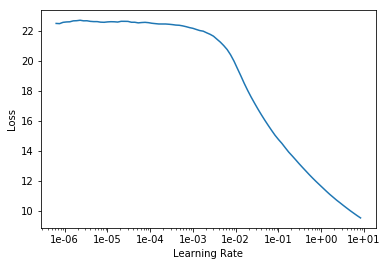

In [30]:
learn.recorder.plot(skip_end=0)

epoch,train_loss,valid_loss,exp_rmspe,time
0,3.230204,2.580894,5.814494,00:05
1,3.012121,2.584430,5.824570,00:05
2,2.994952,2.583997,5.823889,00:05
3,2.628001,1.968134,3.259535,00:05
4,0.594121,0.259150,0.743255,00:05


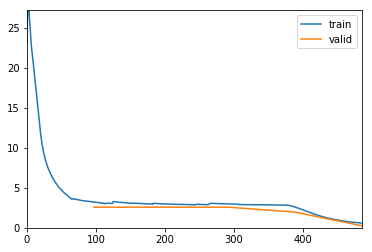

Better model found at epoch 0 with exp_rmspe value: 5.814493656158447.
Better model found at epoch 3 with exp_rmspe value: 3.2595345973968506.
Better model found at epoch 4 with exp_rmspe value: 0.7432551383972168.


In [31]:
learn.fit_one_cycle(5, 1e-1, wd=0.2,
                    callbacks=[ShowGraph(learn),SaveModelCallback(learn,monitor='exp_rmspe',mode='min')])

In [32]:
learn.save('model_vendas_brasal_regressao')

In [33]:
learn.load('model_vendas_brasal_regressao');

In [34]:
# Export the learner
learn.export('model_vendas_brasal_regressao.pkl')

# Predictions on train, valid and test

In [35]:
learn.load('model_vendas_brasal_regressao');

In [36]:
# Get predictions on 'VAL_TOTAL_REAL_ITEM'
train_preds=learn.get_preds(DatasetType.Train)
val_preds=learn.get_preds(DatasetType.Valid)
test_preds=learn.get_preds(DatasetType.Test)

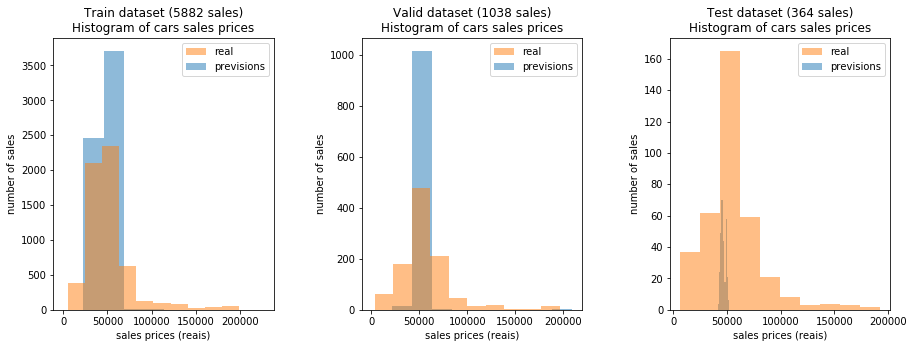

In [37]:
# Set up a figure with set of axes
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax0, ax1, ax2 = ax.flatten()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add axis labels
ax0.set_xlabel('sales prices (reais)')
ax0.set_ylabel('number of sales')
ax1.set_xlabel('sales prices (reais)')
ax1.set_ylabel('number of sales')
ax2.set_xlabel('sales prices (reais)')
ax2.set_ylabel('number of sales')

# Generate the histogram for training
ax0.hist(np.exp(train_preds[0].data).numpy().T[0], alpha=0.5)
ax0.hist(df_train['VAL_TOTAL_REAL_ITEM'], alpha=0.5)
n = len(df_train['VAL_TOTAL_REAL_ITEM'])
ax0.set_title(f'Train dataset ({n} sales)\nHistogram of cars sales prices')

# Generate the histogram for validation
ax1.hist(np.exp(val_preds[0].data).numpy().T[0], alpha=0.5)
ax1.hist(df_valid['VAL_TOTAL_REAL_ITEM'], alpha=0.5)
n = len(df_valid['VAL_TOTAL_REAL_ITEM'])
ax1.set_title(f'Valid dataset ({n} sales)\nHistogram of cars sales prices')

# Generate the histogram for test
ax2.hist(np.exp(test_preds[0].data).numpy().T[0], alpha=0.5)
ax2.hist(df_test['VAL_TOTAL_REAL_ITEM'], alpha=0.5)
n = len(df_test['VAL_TOTAL_REAL_ITEM'])
ax2.set_title(f'Test dataset ({n} sales)\nHistogram of cars sales prices')

# Add a legend
ax0.legend(('real','previsions'), loc='upper right')
ax1.legend(('real','previsions'), loc='upper right')
ax2.legend(('real','previsions'), loc='upper right')

plt.show()

# Prediction on one client

In [38]:
# add_datepart2 will be used for predictions on new client
def add_datepart2(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    if fldname == 'DTA_ENTRADA_SAIDA':
        attr = ['Year', 'Month', 'Dayofweek',
                'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    elif fldname == 'CLIENTE_DTCADASTRO':
        attr = ['Year', 'Month', 
                'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if fldname == 'DATA_NASCIMENTO':
        attr = ['Year', 'Month', 
                'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + '_' + n] = getattr(fld.dt, n.lower())
#     df[targ_pre + '_' + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [39]:
# load clientes file
file = open(PATH/'df_tables','rb')
df_tables = pickle.load(file)
file.close()

df_clientes, _, _, _ = df_tables
df2_clientes = df_clientes.copy()

In [40]:
# Get date of the day
from datetime import datetime
now = datetime.now()
date_now = str(now.year)+'-'+str(now.month)+'-'+str(now.day)+str(' 00:00:00')
print(date_now)

2019-5-15 00:00:00


In [41]:
# By default, we supose that a client goes to the car dealer (EMPRESA, REVENDA) where he/she registered
df2_clientes['EMPRESA_VENDAS'] = df2_clientes['EMPRESA_ORIGEM'].copy()
df2_clientes['REVENDA_VENDAS'] = df2_clientes['REVENDA_ORIGEM'].copy()

# By default, the sale date is now
df2_clientes.loc[:,'DTA_ENTRADA_SAIDA'] = date_now
df2_clientes['DTA_ENTRADA_SAIDA'] = pd.to_datetime(df2_clientes['DTA_ENTRADA_SAIDA'], infer_datetime_format=True)

# Creation of the date fields needed in the entrance of the model
add_datepart2(df2_clientes, "DTA_ENTRADA_SAIDA", drop=False)
add_datepart2(df2_clientes, "CLIENTE_DTCADASTRO", drop=False)
add_datepart2(df2_clientes, "DATA_NASCIMENTO", drop=False)

In [42]:
# Get the dataframe client ready to be read by the model
df3_clientes = df2_clientes[cat_vars+cont_vars].copy()

# List of client_id
client_id_list = df2_clientes['CLIENTE_COD'].unique()

In [43]:
hoje = str(now.year)+'-'+str(now.month)+'-'+str(now.day)
print(f'Previsão do preço do carro que o cliente seguinte está disposto a comprar hoje ({hoje})\n')

# Get the client_id
client_id = input('client_id ? ')
client_id = int(client_id)

# Get the prevision for the client_id
if client_id in client_id_list:
    index = df2_clientes.index[df2_clientes['CLIENTE_COD'] == client_id].tolist()[0]
    _, _ , pred = learn.predict(df3_clientes.iloc[index])
    print(f'\n{int(np.exp(pred[0].item()))} reais')
else:
    print(f'\nO id {client_id} não faz parte da nossa lista de clientes.')

# test_df["Sales"]=np.exp(pred[0].data).numpy().T[0]
# test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
# test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)

Previsão do preço do carro que o cliente seguinte está disposto a comprar hoje (2019-5-15)

client_id ? 70

45333 reais
